In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline


# Prepare Data

In [3]:
data: pd.DataFrame = pd.read_csv("example.data.csv",names=["Channel","Voltage","Time"])
data = data.drop("Channel",axis=1)
data = data.sort_values(by=["Time"])
data.head(5)


,Voltage,Time
0,0.003937,1915
1,0.003937,2218
2,0.003937,2520
3,0.003937,2616
4,0.003937,2728


In [4]:
timeDiff = data.drop("Voltage",axis=1)

timeDiff = timeDiff.diff()
timeDiff = timeDiff.drop([0],axis=0)
timeDiff["Hertz"] = timeDiff.apply(lambda row: 1/(row[0]/1000), axis=1)
print(timeDiff.head(10))

     Time      Hertz
1   303.0   3.300330
2   302.0   3.311258
3    96.0  10.416667
4   112.0   8.928571
5   192.0   5.208333
6    95.0  10.526316
7   112.0   8.928571
8    95.0  10.526316
9    95.0  10.526316
10  111.0   9.009009


# Frequency Analysis

### Average Frequency

In [5]:
average = timeDiff["Hertz"].mean()
average

7.4101020466184595

In [6]:

sigma = timeDiff["Hertz"].std()

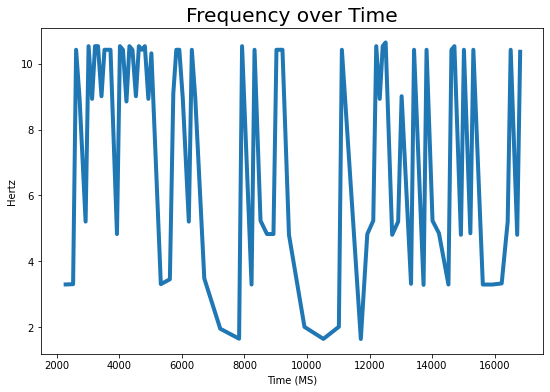

In [7]:
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(data["Time"].drop([0],axis=0),timeDiff["Hertz"])

# ax.fill_between(x,y,0, alpha=0.3, color='b')
# ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlabel('Time (MS)')
ax.set_ylabel('Hertz')

ax.set_title('Frequency over Time')

plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()